# CLASSIFICATION OF HANDWRITTEN DIGITS IN MNIST DATASET USING ***CNN***

> MODELING WITH GUI INTERFACE


                                            -BY SUCHITA SRIVASTAVA
                                            COURSE: ARTIFICIAL INTELLIGENCE


In [126]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [127]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [128]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [129]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [130]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [131]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [132]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1449 - accuracy: 0.9537 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0340 - accuracy: 0.9897 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0290 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0316 -

In [133]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.0293 - accuracy: 0.9934 - 3s/epoch - 8ms/step

Test accuracy: 0.993399977684021


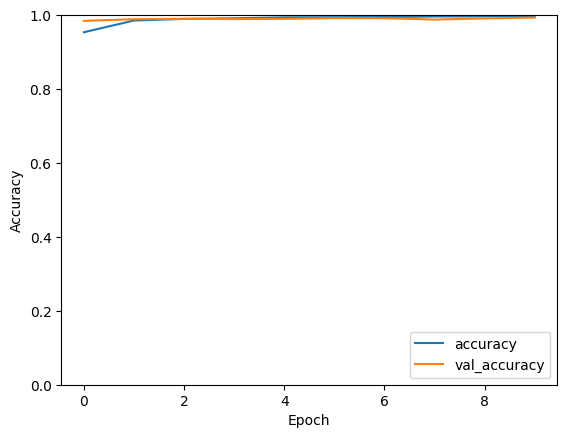

In [134]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [135]:
model.save("mnist_cnn_model.h5")

In [136]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [137]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [138]:
model = models.load_model("mnist_cnn_model.h5")

In [139]:
def predict_digit(image):
    # Preprocess the uploaded image
    image_array = np.array(image)

    # Ensure the image is 2D (grayscale)
    if len(image_array.shape) == 2:
        image_array = image_array / 255.0
    elif len(image_array.shape) == 3:
        if image_array.shape[2] == 3:
            image_array = np.mean(image_array, axis=2)  # Convert to grayscale if it's a color image
            image_array = image_array / 255.0
        elif image_array.shape[2] == 4:
            image_array = image_array[:, :, :3]  # Remove alpha channel from RGBA image
            image_array = np.mean(image_array, axis=2) / 255.0
    else:
        raise ValueError("Unsupported image format")

    image_array = tf.image.resize(image_array, (28, 28))

    prediction = model.predict(np.expand_dims(image_array, axis=0))
    digit = np.argmax(prediction)

    # Display the image and prediction
    plt.figure()
    plt.imshow(image_array, cmap=plt.cm.binary)
    plt.title(f"Prediction: {digit}")
    plt.show()

In [140]:
file_upload = widgets.FileUpload(accept='.png, .jpg', multiple=False)
predict_button = widgets.Button(description="Predict Digit")

output = widgets.Output()

def predict_button_click(b):
    with output:
        clear_output(wait=True)
        image = Image.open(BytesIO(file_upload.data[0]))
        predict_digit(image)

predict_button.on_click(predict_button_click)

In [141]:
display(file_upload)
display(predict_button)
display(output)

def predict_button_click(b):
    with output:
        clear_output(wait=True)
        image = Image.open(BytesIO(file_upload.data[0]))
        print(image.size)
        print(np.array(image).shape)
        predict_digit(image)

FileUpload(value={}, accept='.png, .jpg', description='Upload')

Button(description='Predict Digit', style=ButtonStyle())

Output()